In [1]:
import awkward as ak
import uproot
import matplotlib.pyplot as plt

In [2]:
fname = "49fd124a-ce9c-41ea-b3c6-01b46d547322.root"

In [3]:
with uproot.open(fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")


['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [4]:
Events.fields

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'HTXS_njets25',
 'HTXS_njets30',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'BeamSpot_type',
 'BeamSpot_sigmaZ',
 'BeamSpot_sigmaZError',
 'BeamSpot_z',
 'BeamSpot_zError',
 'nboostedTau',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nGenProton',
 'nSubGenJetAK8',
 'Generator_id1',
 'Generator_id2',
 'Generator_binvar',
 'Generator_

In [6]:
GenJet = Events.GenJet

In [8]:
ak.num(GenJet.pt)

<Array [5, 4, 4, 5, 5, 3, 5, 5, ..., 8, 3, 6, 3, 7, 5, 7] type='183834 * int64'>

In [4]:
gen = Events.GenPart

In [4]:
photons = Events.Photon

In [7]:
photons.fields

['seediEtaOriX',
 'cutBased',
 'electronVeto',
 'hasConversionTracks',
 'isScEtaEB',
 'isScEtaEE',
 'mvaID_WP80',
 'mvaID_WP90',
 'pixelSeed',
 'seedGain',
 'electronIdx',
 'jetIdx',
 'seediPhiOriY',
 'vidNestedWPBitmap',
 'ecalPFClusterIso',
 'energyErr',
 'energyRaw',
 'esEffSigmaRR',
 'esEnergyOverRawE',
 'eta',
 'etaWidth',
 'haloTaggerMVAVal',
 'hcalPFClusterIso',
 'hoe',
 'hoe_PUcorr',
 'mvaID',
 'pfChargedIso',
 'pfChargedIsoPFPV',
 'pfChargedIsoWorstVtx',
 'pfPhoIso03',
 'pfRelIso03_all_quadratic',
 'pfRelIso03_chg_quadratic',
 'phi',
 'phiWidth',
 'pt',
 'r9',
 's4',
 'sieie',
 'sieip',
 'sipip',
 'superclusterEta',
 'trkSumPtHollowConeDR03',
 'trkSumPtSolidConeDR04',
 'x_calo',
 'y_calo',
 'z_calo',
 'genPartFlav',
 'genPartIdx']

In [5]:
jets = Events.Jet

In [10]:
jets.fields

['chMultiplicity',
 'jetId',
 'nConstituents',
 'nElectrons',
 'nMuons',
 'nSVs',
 'neMultiplicity',
 'electronIdx1',
 'electronIdx2',
 'muonIdx1',
 'muonIdx2',
 'svIdx1',
 'svIdx2',
 'hfadjacentEtaStripsSize',
 'hfcentralEtaStripSize',
 'PNetRegPtRawCorr',
 'PNetRegPtRawCorrNeutrino',
 'PNetRegPtRawRes',
 'area',
 'btagDeepFlavB',
 'btagDeepFlavCvB',
 'btagDeepFlavCvL',
 'btagDeepFlavQG',
 'btagPNetB',
 'btagPNetCvB',
 'btagPNetCvL',
 'btagPNetQvG',
 'btagPNetTauVJet',
 'btagRobustParTAK4B',
 'btagRobustParTAK4CvB',
 'btagRobustParTAK4CvL',
 'btagRobustParTAK4QG',
 'chEmEF',
 'chHEF',
 'eta',
 'hfEmEF',
 'hfHEF',
 'hfsigmaEtaEta',
 'hfsigmaPhiPhi',
 'mass',
 'muEF',
 'muonSubtrFactor',
 'neEmEF',
 'neHEF',
 'phi',
 'pt',
 'rawFactor',
 'hadronFlavour',
 'genJetIdx',
 'partonFlavour']

In [6]:
numJets = ak.num(jets)

In [7]:
numJets

<Array [3, 3, 5, 1, 3, 2, 7, 4, ..., 7, 5, 7, 3, 5, 5, 6] type='183834 * int64'>

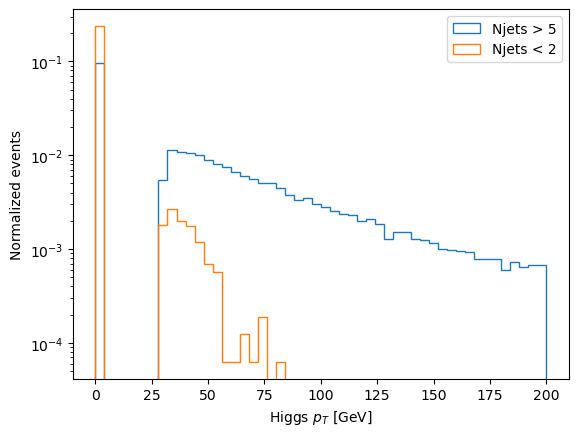

In [12]:
events = Events
# Higgs boson selection
is_higgs = events["GenPart"]["pdgId"] == 25
h_pt = events["GenPart"]["pt"][is_higgs]

# One Higgs per event (take the first if multiple exist)
h_pt = ak.firsts(h_pt)

# Jet multiplicity
njet = ak.num(events["Jet"])

# Event selections
mask_highjets = njet > 5
mask_lowjets  = njet < 2

h_pt_highjets = h_pt[mask_highjets]
h_pt_lowjets  = h_pt[mask_lowjets]

# Plot
plt.hist(ak.to_numpy(h_pt_highjets), bins=50, histtype="step", label="Njets > 5", density=True, range = (0, 200))
plt.hist(ak.to_numpy(h_pt_lowjets),  bins=50, histtype="step", label="Njets < 2", density=True, range = (0, 200))

plt.yscale("log")

plt.xlabel("Higgs $p_T$ [GeV]")
plt.ylabel("Normalized events")
plt.legend()
plt.show()

In [13]:
import ROOT
%jsroot on 
import awkward as ak
import numpy as np

events = Events
# Higgs boson selection
is_higgs = events["GenPart"]["pdgId"] == 25
h_pt = events["GenPart"]["pt"][is_higgs]

# One Higgs per event (take the first if multiple exist)
h_pt = ak.firsts(h_pt)

# Jet multiplicity
njet = ak.num(events["Jet"])

# Event selections
mask_highjets = njet > 5
mask_lowjets  = njet < 3

h_pt_highjets = h_pt[mask_highjets]
h_pt_lowjets  = h_pt[mask_lowjets]

# Convert awkward arrays to numpy
h_pt_highjets_np = ak.to_numpy(h_pt_highjets)
h_pt_lowjets_np  = ak.to_numpy(h_pt_lowjets)

# Define histograms
h_high = ROOT.TH1F("h_high", "Higgs pT; Higgs p_{T} [GeV]; Normalized events", 50, 0, 200)
h_low  = ROOT.TH1F("h_low",  "Higgs pT; Higgs p_{T} [GeV]; Normalized events", 50, 0, 200)

# Fill histograms
for val in h_pt_highjets_np:
    h_high.Fill(val)

for val in h_pt_lowjets_np:
    h_low.Fill(val)

# Normalize to 1
if h_high.Integral() > 0:
    h_high.Scale(1.0 / h_high.Integral())
if h_low.Integral() > 0:
    h_low.Scale(1.0 / h_low.Integral())

# Style
h_high.SetLineColor(ROOT.kRed)
h_low.SetLineColor(ROOT.kBlue)
h_high.SetLineWidth(2)
h_low.SetLineWidth(2)

# Draw
c = ROOT.TCanvas("c", "Higgs pT comparison", 800, 600)
c.SetLogy()

h_high.Draw("HIST")
h_low.Draw("HIST SAME")

# Legend
leg = ROOT.TLegend(0.6, 0.7, 0.88, 0.88)
leg.AddEntry(h_high, "Njets > 5", "l")
leg.AddEntry(h_low,  "Njets < 3", "l")
leg.Draw()

c.Update()
c.SaveAs("pT_comparison.png")
c.Draw()


/tmp/bbapi/ipykernel_763079/2980140077.py:34: UserWarning: Warning: converting a masked element to nan.
  h_high.Fill(val)
/tmp/bbapi/ipykernel_763079/2980140077.py:37: UserWarning: Warning: converting a masked element to nan.
  h_low.Fill(val)


Warning in <TROOT::Append>: Replacing existing TH1: h_high (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_low (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file pT_comparison.png has been created


In [15]:
import ROOT
%jsroot on 
import awkward as ak
import numpy as np

events = Events
# Higgs boson selection
is_higgs = events["GenPart"]["pdgId"] == 25
h_pt = events["GenPart"]["pt"][is_higgs]

# One Higgs per event (take the first if multiple exist)
h_pt = ak.firsts(h_pt)

# Jet multiplicity
# njet = ak.num(events["Jet"])
nGenJet = ak.num(GenJet.pt)

max = 5
min = 5

# Event selections
mask_highjets = nGenJet > max 
mask_lowjets  = nGenJet <= min

h_pt_highjets = h_pt[mask_highjets]
h_pt_lowjets  = h_pt[mask_lowjets]

# Convert awkward arrays to numpy
h_pt_highjets_np = ak.to_numpy(h_pt_highjets)
h_pt_lowjets_np  = ak.to_numpy(h_pt_lowjets)

# Define histograms
h_high = ROOT.TH1F("h_high", "Higgs pT; Higgs p_{T} [GeV]; Normalized events", 50, 0, 200)
h_low  = ROOT.TH1F("h_low",  "Higgs pT; Higgs p_{T} [GeV]; Normalized events", 50, 0, 200)

# Fill histograms
for val in h_pt_highjets_np:
    h_high.Fill(val)

for val in h_pt_lowjets_np:
    h_low.Fill(val)

# # Normalize to 1
# if h_high.Integral() > 0:
#     h_high.Scale(1.0 / h_high.Integral())
# if h_low.Integral() > 0:
#     h_low.Scale(1.0 / h_low.Integral())

# Style
h_high.SetLineColor(ROOT.kRed)
h_low.SetLineColor(ROOT.kBlue)
h_high.SetLineWidth(2)
h_low.SetLineWidth(2)

# Draw
c = ROOT.TCanvas("c", "Higgs pT comparison", 800, 600)
# c.SetLogy()

h_high.Draw("HIST")
h_low.Draw("HIST SAME")

# Legend
leg = ROOT.TLegend(0.6, 0.7, 0.88, 0.88)
leg.AddEntry(h_high, f"Njets > {max}", "l")
leg.AddEntry(h_low,  f"Njets <= {min}", "l")
leg.Draw()

c.Update()
c.SaveAs("pT_comparison.png")
c.Draw()

/tmp/bbapi/ipykernel_4054359/904968846.py:38: UserWarning: Warning: converting a masked element to nan.
  h_high.Fill(val)
/tmp/bbapi/ipykernel_4054359/904968846.py:41: UserWarning: Warning: converting a masked element to nan.
  h_low.Fill(val)


Warning in <TROOT::Append>: Replacing existing TH1: h_high (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_low (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file pT_comparison.png has been created


In [20]:
import ROOT
%jsroot on 
import awkward as ak
import numpy as np

events = Events
# Higgs boson selection
is_higgs = events["GenPart"]["pdgId"] == 25
h_pt = events["GenPart"]["pt"][is_higgs]

# One Higgs per event (take the first if multiple exist)
h_pt = ak.firsts(h_pt)

# Jet multiplicity
nGenJet = ak.num(GenJet.pt)

max = 5
min = 5

# Event selections
mask_highjets = nGenJet > max 
mask_lowjets  = nGenJet <= min

h_pt_highjets = h_pt[mask_highjets]
h_pt_lowjets  = h_pt[mask_lowjets]

# Convert awkward arrays to numpy
h_pt_highjets_np = ak.to_numpy(h_pt_highjets)
h_pt_lowjets_np  = ak.to_numpy(h_pt_lowjets)

# Define histograms
h_high = ROOT.TH1F("h_high", "Higgs pT; Higgs p_{T} [GeV]; Events", 50, 0, 200)
h_low  = ROOT.TH1F("h_low",  "Higgs pT; Higgs p_{T} [GeV]; Events", 50, 0, 200)

# Fill histograms
for val in h_pt_highjets_np:
    h_high.Fill(val)

for val in h_pt_lowjets_np:
    h_low.Fill(val)

# Style
h_high.SetLineColor(ROOT.kRed)
h_low.SetLineColor(ROOT.kBlue)
h_high.SetLineWidth(2)
h_low.SetLineWidth(2)

# Turn off stat box
ROOT.gStyle.SetOptStat(0)

# Draw
c = ROOT.TCanvas("c", "Higgs pT comparison", 800, 600)

h_high.Draw("HIST")
h_low.Draw("HIST SAME")

# Legend with N and mean
leg = ROOT.TLegend(0.55, 0.65, 0.88, 0.88)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

# Get stats
N_high  = int(h_high.GetEntries())
mean_high = h_high.GetMean()

N_low   = int(h_low.GetEntries())
mean_low  = h_low.GetMean()

# Labels with TLatex symbols
label_high = f"Njets > {max}:  N={N_high},  <p_{{T}}>={mean_high:.1f}"
label_low  = f"Njets #leq {min}: N={N_low},  <p_{{T}}>={mean_low:.1f}"

# Add to legend
leg.AddEntry(h_high, label_high, "l")
leg.AddEntry(h_low,  label_low,  "l")
leg.Draw()

c.Update()
c.SaveAs("pT_comparison.png")
c.Draw()


/tmp/bbapi/ipykernel_4054359/1408607469.py:37: UserWarning: Warning: converting a masked element to nan.
  h_high.Fill(val)
/tmp/bbapi/ipykernel_4054359/1408607469.py:40: UserWarning: Warning: converting a masked element to nan.
  h_low.Fill(val)
Warning in <TROOT::Append>: Replacing existing TH1: h_high (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_low (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file pT_comparison.png has been created


In [51]:
# Jet multiplicity
nGenJet = ak.num(GenJet.pt)

# Convert to numpy
nGenJet_np = ak.to_numpy(nGenJet)

# Define histogram
h_njets = ROOT.TH1F("h_njets", "GenJet multiplicity; N_{GenJet}; Events", 15, -0.5, 14.5)

# Fill histogram
for val in nGenJet_np:
    h_njets.Fill(val)

# Style
h_njets.SetLineColor(ROOT.kBlack)
h_njets.SetLineWidth(2)

# Draw
c2 = ROOT.TCanvas("c2", "GenJet multiplicity", 800, 600)
h_njets.Draw("HIST")

# Legend (optional: show entries and mean jet multiplicity)
N_entries = int(h_njets.GetEntries())
mean_njet = h_njets.GetMean()

leg2 = ROOT.TLegend(0.6, 0.75, 0.88, 0.88)
leg2.SetBorderSize(0)
leg2.SetFillStyle(0)
leg2.AddEntry(h_njets, f"N={N_entries},  <N_{{jets}}>={mean_njet:.2f}", "l")
leg2.Draw()

c2.Update()
c2.SaveAs("GenJet_multiplicity.png")
c2.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file GenJet_multiplicity.png has been created


In [55]:
events = Events

# --- Higgs boson selection ---
is_higgs = events["GenPart"]["pdgId"] == 25
h_pt = events["GenPart"]["pt"][is_higgs]
h_pt = ak.firsts(h_pt)  # one Higgs per event

# --- Jet multiplicity ---
nGenJet = ak.num(GenJet.pt)

# --- Define bins: 0,1,2,3,4,5, >5 ---
categories = {
    "Njets=0":  (nGenJet == 0),
    "Njets=1":  (nGenJet == 1),
    "Njets=2":  (nGenJet == 2),
    "Njets=3":  (nGenJet == 3),
    "Njets=4":  (nGenJet == 4),
    "Njets=5":  (nGenJet == 5),
    "Njets>5":  (nGenJet > 5),
}

colors = [ROOT.kBlack, ROOT.kRed, ROOT.kBlue, ROOT.kGreen+2,
          ROOT.kMagenta, ROOT.kOrange+1, ROOT.kCyan+2]

# --- Store histograms ---
hists = {}
for i, (label, mask) in enumerate(categories.items()):
    h_pt_sel = h_pt[mask]
    h_pt_np = ak.to_numpy(h_pt_sel)

    hist = ROOT.TH1F(f"h_{label}", "Higgs pT; Higgs p_{T} [GeV]; Events", 50, 0, 200)
    for val in h_pt_np:
        hist.Fill(val)

    hist.SetLineColor(colors[i])
    hist.SetLineWidth(2)
    hists[label] = hist

# Clear any old histograms in memory
ROOT.gDirectory.Delete("*")

# --- Store histograms ---
hists = {}
for i, (label, mask) in enumerate(categories.items()):
    h_pt_sel = h_pt[mask]
    h_pt_np = ak.to_numpy(h_pt_sel)

    hist_name = f"h_{label}_{i}"  # unique name
    hist_title = f"Higgs pT ({label}); Higgs p_{{T}} [GeV]; Events"
    hist = ROOT.TH1F(hist_name, hist_title, 50, 0, 200)
    
    for val in h_pt_np:
        hist.Fill(val)

    hist.SetLineColor(colors[i])
    hist.SetLineWidth(2)
    hists[label] = hist

# --- Global style ---
ROOT.gStyle.SetOptStat(0)

# --- Function to draw ---
def draw_plot(hists, logy=False, outfile="plot.png"):
    c = ROOT.TCanvas("c", "Higgs pT vs Njets", 800, 600)
    c.Clear()

    # Avoid issues if max() is overwritten
    ymax = builtins.max(h.GetMaximum() for h in hists.values())
    ymin = 0.1 if logy else 0
    list(hists.values())[0].GetYaxis().SetRangeUser(ymin, 1.2 * ymax)

    if logy:
        c.SetLogy()
        for h in hists.values():
            h.SetMinimum(0.1)

    first = True
    for hist in hists.values():
        hist.SetTitle("Higgs pT vs Njets")
        opt = "HIST" if first else "HIST SAME"
        hist.Draw(opt)
        first = False

    # Legend
    # leg = ROOT.TLegend(0.5, 0.55, 0.88, 0.88)
    # leg = ROOT.TLegend(0.65, 0.65, 0.88, 0.88)
    leg = ROOT.TLegend(0.60, 0.65, 0.85, 0.88)
    leg.SetBorderSize(0)
    leg.SetFillStyle(0)
    leg.SetTextSize(0.025)

    for label, hist in hists.items():
        N = int(hist.GetEntries())
        mean = hist.GetMean()
        leg.AddEntry(hist, f"{label}: N={N}, <p_{{T}}>={mean:.1f}", "l")

    leg.Draw()
    c.Update()
    c.SaveAs(outfile)
import ROOT
import builtins

def draw_normalized_plot(hists, logy=False, outfile="plot.png", title="Higgs pT vs Njets Normalized"):
    c = ROOT.TCanvas("c", title, 800, 600)
    c.Clear()

    # Normalize all histograms
    for hist in hists.values():
        integral = hist.Integral()
        if integral != 0:
            hist.Scale(1.0 / integral)
        hist.SetTitle(title)          # main title
        hist.GetXaxis().SetTitle("pT [GeV]")
        hist.GetYaxis().SetTitle("Normalized Events")

    # Set Y-axis range
    ymax = builtins.max(h.GetMaximum() for h in hists.values())
    ymin = 0.001 if logy else 0  # small ymin for log scale
    list(hists.values())[0].GetYaxis().SetRangeUser(ymin, 1.2 * ymax)

    if logy:
        c.SetLogy()
        for h in hists.values():
            h.SetMinimum(0.001)

    # Draw histograms
    first = True
    for hist in hists.values():
        opt = "HIST" if first else "HIST SAME"
        hist.Draw(opt)
        first = False

    # Legend
    leg = ROOT.TLegend(0.60, 0.65, 0.85, 0.88)
    leg.SetBorderSize(0)
    leg.SetFillStyle(0)
    leg.SetTextSize(0.025)
    # for label, hist in hists.items():
    #     leg.AddEntry(hist, label, "l")
    # leg.Draw()
    for label, hist in hists.items():
        N = int(hist.GetEntries())
        mean = hist.GetMean()
        leg.AddEntry(hist, f"{label}: <p_{{T}}>={mean:.1f}", "l")
    leg.Draw()

    c.Update()
    c.SaveAs(outfile)


# --- Draw plots ---
draw_plot(hists, logy=False, outfile="Higgs_pT_vs_Njets_lin.png")
draw_plot(hists, logy=True,  outfile="Higgs_pT_vs_Njets_log.png")
# Linear normalized plot
draw_normalized_plot(hists, logy=False, outfile="Higgs_pT_vs_Njets_norm_lin.png")

# Log normalized plot
draw_normalized_plot(hists, logy=True,  outfile="Higgs_pT_vs_Njets_norm_log.png")


/tmp/bbapi/ipykernel_4054359/4189102790.py:33: UserWarning: Warning: converting a masked element to nan.
  hist.Fill(val)
/tmp/bbapi/ipykernel_4054359/4189102790.py:53: UserWarning: Warning: converting a masked element to nan.
  hist.Fill(val)
Info in <TCanvas::Print>: png file Higgs_pT_vs_Njets_lin.png has been created
Info in <TCanvas::Print>: png file Higgs_pT_vs_Njets_log.png has been created
Info in <TCanvas::Print>: png file Higgs_pT_vs_Njets_norm_lin.png has been created
Info in <TCanvas::Print>: png file Higgs_pT_vs_Njets_norm_log.png has been created


In [8]:
num_highjets = len(h_pt_highjets_np)
num_lowjets  = len(h_pt_lowjets_np)

print("Number of Higgs in events with Njets>5:", num_highjets)
print("Number of Higgs in events with Njets<2:", num_lowjets)


Number of Higgs in events with Njets>5: 46567
Number of Higgs in events with Njets<2: 21937


In [23]:
ak.sum(nGenJet == 0)

88